In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import seaborn as sns
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
CFG = {
    'rootdir': '/content/drive/My Drive/BW/'
}

In [ ]:

train = pd.read_csv(CFG['rootdir'] + 'train.csv')
test = pd.read_csv(CFG['rootdir'] + 'test.csv')
submission_sample = pd.read_csv(CFG['rootdir'] + 'sample_submission.csv')

In [ ]:
os.mkdir('/content/drive/My Drive/BW/Train')
os.mkdir('/content/drive/My Drive/BW/Test')
os.mkdir('/content/drive/My Drive/BW/Valid')

In [ ]:
df=pd.read_csv('/content/drive/My Drive/BW/train.csv',index_col=False)
dftest=pd.read_csv('/content/drive/My Drive/BW/test.csv',index_col=False)

In [ ]:
len(os.listdir('/content/drive/My Drive/BW/images'))

1584

In [ ]:
df['species'].nunique()

99

In [ ]:
Species_Image = pd.DataFrame({'Id': range(1,991),
                       'Species': df.species})

In [ ]:
Species_Image

,Id,Species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,4,Tilia_Tomentosa
4,5,Quercus_Variabilis
...,...,...
985,986,Magnolia_Salicifolia
986,987,Acer_Pictum
987,988,Alnus_Maximowiczii
988,989,Quercus_Rubra


In [ ]:
for image_filename in os.listdir('/content/drive/My Drive/BW/images'):
    a = int(image_filename.split('.')[0])
    if a > 990:
        imgsav = imread('/content/drive/My Drive/BW/images'+'/'+image_filename)
        path = '/content/drive/My Drive/BW/Test'
        cv2.imwrite(os.path.join(path , image_filename), imgsav)
    else:
        imgsav = imread('/content/drive/My Drive/BW/images'+'/'+image_filename)
        path = '/content/drive/My Drive/BW/Train'
        cv2.imwrite(os.path.join(path , image_filename), imgsav)

In [ ]:
len(os.listdir('/content/drive/My Drive/BW/Train'))

2970

In [ ]:
len(os.listdir('/content/drive/My Drive/BW/Test'))

594

In [ ]:
image_gen_one_v = ImageDataGenerator()
image_gen_one_h = ImageDataGenerator()
image_gen_one_30d = ImageDataGenerator()

In [ ]:
count=991
for i in range(1,991):
    image_filename=str(i)+'.jpg'
    leaf_img_path = '/content/drive/My Drive/BW/Train'+'/'+image_filename
    leaf_img = imread(leaf_img_path)


    if leaf_img.ndim == 2:
        leaf_img = gray2rgb(leaf_img)

    imgsav=image_gen_one_v.random_transform(leaf_img)
    path= '/content/drive/My Drive/BW/Train'
    image_filename=str(count)+".jpg"
    cv2.imwrite(os.path.join(path , image_filename), imgsav)
    count=count+1


In [ ]:
count=1981
for i in range(1,991):
    image_filename=str(i)+'.jpg'
    leaf_img_path = '/content/drive/My Drive/BW/Train'+'/'+image_filename
    leaf_img = imread(leaf_img_path)

    if leaf_img.ndim == 2:
        leaf_img = gray2rgb(leaf_img)

    imgsav=image_gen_one_h.random_transform(leaf_img)
    path= '/content/drive/My Drive/BW/Train'
    image_filename=str(count)+".jpg"
    cv2.imwrite(os.path.join(path , image_filename), imgsav)
    count=count+1

In [ ]:
for i in range(1,991):
    image_filename=str(i)+'.jpg'
    leaf_img_path = '/content/drive/My Drive/BW/Train'+'/'+image_filename
    leaf_img = imread(leaf_img_path)

    if leaf_img.ndim == 2:
        leaf_img = gray2rgb(leaf_img)
    imgsav=image_gen_one_30d.random_transform(leaf_img)
    path= '/content/drive/My Drive/BW/Valid'
    image_filename=str(i)+".jpg"
    cv2.imwrite(os.path.join(path , image_filename), imgsav)

In [ ]:

len(os.listdir('/content/drive/My Drive/BW/Train'))

2970

In [ ]:
Species_Image_v = pd.DataFrame({'Id': range(991,1981),
                       'Species': df.species})

In [ ]:
Species_Image_h = pd.DataFrame({'Id': range(1981,2971),
                       'Species': df.species})

In [ ]:
ImageId_Species = pd.concat([Species_Image,Species_Image_v,Species_Image_h])

In [ ]:
ImageId_Species['Id']=ImageId_Species['Id'].astype(str)+".jpg"

In [ ]:
ImageId_Species['Index 6t']=ImageId_Species['Id'].apply(lambda a: a.split('.')[0])

In [ ]:
ImageId_Species.set_index('Index', inplace=True)

In [ ]:
y_Train = ImageId_Species
Validation_30deg = ImageId_Species.iloc[:990,:]

In [ ]:
y_Train

,Id,Species
Index,,
1,1.jpg,Acer_Opalus
2,2.jpg,Pterocarya_Stenoptera
3,3.jpg,Quercus_Hartwissiana
4,4.jpg,Tilia_Tomentosa
5,5.jpg,Quercus_Variabilis
...,...,...
2966,2966.jpg,Magnolia_Salicifolia
2967,2967.jpg,Acer_Pictum
2968,2968.jpg,Alnus_Maximowiczii


In [ ]:
Validation_30deg

,Id,Species
Index,,
1,1.jpg,Acer_Opalus
2,2.jpg,Pterocarya_Stenoptera
3,3.jpg,Quercus_Hartwissiana
4,4.jpg,Tilia_Tomentosa
5,5.jpg,Quercus_Variabilis
...,...,...
986,986.jpg,Magnolia_Salicifolia
987,987.jpg,Acer_Pictum
988,988.jpg,Alnus_Maximowiczii


In [ ]:
y_Train.Species.nunique()

99

In [ ]:
Validation_30deg.Species.nunique()

99

In [ ]:
datagen=ImageDataGenerator(rescale=1./255)

In [ ]:

image_shape =(256,256,1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(99, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
train_generator = datagen.flow_from_dataframe(dataframe=y_Train,
                                              directory='/content/drive/My Drive/BW/Train',
                                              x_col="Id", y_col="Species",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              target_size=(256,256), batch_size=16)

Found 2970 validated image filenames belonging to 99 classes.


In [ ]:
test_generator = datagen.flow_from_dataframe(dataframe=Validation_30deg,
                                              directory='/content/drive/My Drive/BW/Valid',
                                              x_col="Id", y_col="Species",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              target_size=(256,256), batch_size=16)

Found 990 validated image filenames belonging to 99 classes.


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size

In [ ]:
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

185
61


In [ ]:
results = model.fit_generator(generator=train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=test_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=10)

<ipython-input-33-af6fd69d43f3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(generator=train_generator,


Epoch 1/10
185/185 [==============================] - 631s 3s/step - loss: 4.4022 - accuracy: 0.0569 - val_loss: 3.0914 - val_accuracy: 0.3535
Epoch 2/10
185/185 [==============================] - 274s 1s/step - loss: 2.2308 - accuracy: 0.4712 - val_loss: 0.4500 - val_accuracy: 0.8965
Epoch 3/10
185/185 [==============================] - 287s 2s/step - loss: 0.6887 - accuracy: 0.8118 - val_loss: 0.0753 - val_accuracy: 0.9928
Epoch 4/10
185/185 [==============================] - 275s 1s/step - loss: 0.3116 - accuracy: 0.9103 - val_loss: 0.0196 - val_accuracy: 0.9980
Epoch 5/10
185/185 [==============================] - 287s 2s/step - loss: 0.2419 - accuracy: 0.9320 - val_loss: 0.0073 - val_accuracy: 0.9990
Epoch 6/10
185/185 [==============================] - 271s 1s/step - loss: 0.1951 - accuracy: 0.9414 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 7/10
185/185 [==============================] - 270s 1s/step - loss: 0.1551 - accuracy: 0.9557 - val_loss: 0.0042 - val_accuracy: 1.0000

In [ ]:
losses = pd.DataFrame(results.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,4.402219,0.056872,3.091445,0.353484
1,2.230817,0.471225,0.450027,0.896516
2,0.688675,0.811781,0.075321,0.992828
3,0.311550,0.910291,0.019598,0.997951
4,0.241876,0.931957,0.007340,0.998975


<Axes: >

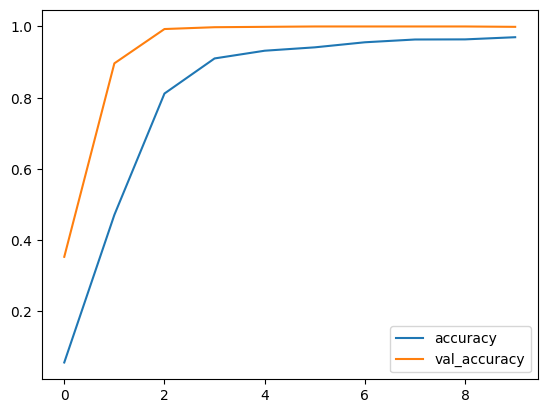

In [ ]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

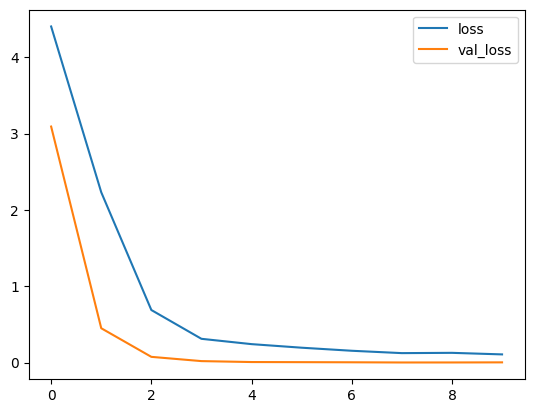

In [ ]:
losses[['loss','val_loss']].plot()

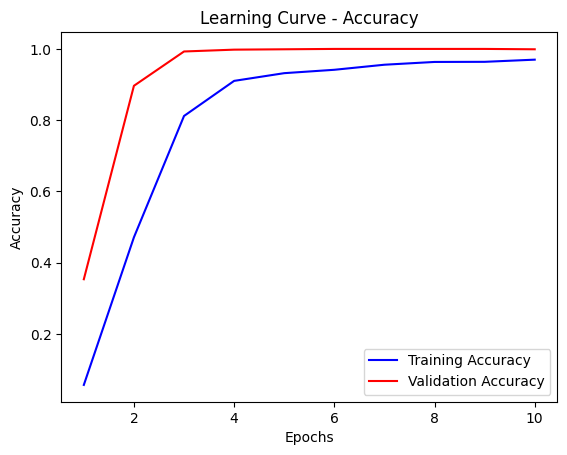

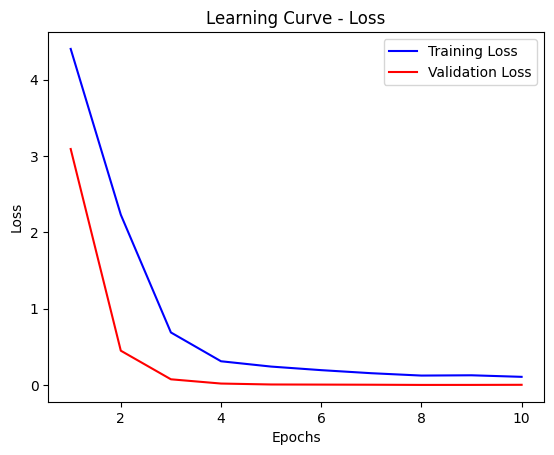

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy/loss values from the results
train_accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']
train_loss = results.history['loss']
val_loss = results.history['val_loss']

# Generate x-axis values (epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
predicted_labels = model.predict_generator(test_generator, steps=STEP_SIZE_VALID)


<ipython-input-39-3cadc29c48d6>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_labels = model.predict_generator(test_generator, steps=STEP_SIZE_VALID)


In [ ]:
predicted_classes = np.argmax(predicted_labels, axis=1)
true_classes = test_generator.classes


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1score, _ = precision_recall_fscore_support(true_classes, predicted_classes, average='weighted')


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1score, _ = precision_recall_fscore_support(true_classes, predicted_classes, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1score)


Precision: 0.8666666666666666
Recall: 0.8
F1-score: 0.8


In [ ]:
from PIL import Image, ImageFilter
import tensorflow as tf
import keras.preprocessing
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
image = Image.open('/content/drive/My Drive/BW/Train/2970.jpg')
image = image.resize((256,256))
image = image.convert('L')
input_arr = np.array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr.shape
predictions = model.predict(input_arr)
predictions

1/1 [==============================] - 0s 167ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [ ]:
label_map = (train_generator.class_indices)

In [ ]:
label_map

{'Acer_Capillipes': 0,
 'Acer_Circinatum': 1,
 'Acer_Mono': 2,
 'Acer_Opalus': 3,
 'Acer_Palmatum': 4,
 'Acer_Pictum': 5,
 'Acer_Platanoids': 6,
 'Acer_Rubrum': 7,
 'Acer_Rufinerve': 8,
 'Acer_Saccharinum': 9,
 'Alnus_Cordata': 10,
 'Alnus_Maximowiczii': 11,
 'Alnus_Rubra': 12,
 'Alnus_Sieboldiana': 13,
 'Alnus_Viridis': 14,
 'Arundinaria_Simonii': 15,
 'Betula_Austrosinensis': 16,
 'Betula_Pendula': 17,
 'Callicarpa_Bodinieri': 18,
 'Castanea_Sativa': 19,
 'Celtis_Koraiensis': 20,
 'Cercis_Siliquastrum': 21,
 'Cornus_Chinensis': 22,
 'Cornus_Controversa': 23,
 'Cornus_Macrophylla': 24,
 'Cotinus_Coggygria': 25,
 'Crataegus_Monogyna': 26,
 'Cytisus_Battandieri': 27,
 'Eucalyptus_Glaucescens': 28,
 'Eucalyptus_Neglecta': 29,
 'Eucalyptus_Urnigera': 30,
 'Fagus_Sylvatica': 31,
 'Ginkgo_Biloba': 32,
 'Ilex_Aquifolium': 33,
 'Ilex_Cornuta': 34,
 'Liquidambar_Styraciflua': 35,
 'Liriodendron_Tulipifera': 36,
 'Lithocarpus_Cleistocarpus': 37,
 'Lithocarpus_Edulis': 38,
 'Magnolia_Heptapeta':

In [ ]:
L=[]
for i in range(991,1585):
    image_filename=str(i)+'.jpg'
    leaf_img_path = '/content/drive/My Drive/BW/Test'+'/'+image_filename
    leaf_img = Image.open(leaf_img_path)
    image = leaf_img.resize((256,256))
    input_arr = np.array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    #input_arr.shape
    predictions = model.predict(input_arr)
    Pre_Species = pd.DataFrame({'Id': list(predictions.reshape(99)),'LabelMap': list(label_map)})
    L.append(str(Pre_Species[Pre_Species.Id==1.0].LabelMap).split()[1])

1/1 [==============================] - 0s 51ms/step


In [ ]:
len(L)

594

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Generating df for predicted images.
ImageId_Species_test = pd.DataFrame({'Id': [str(a)+'.jpg' for a in range(991,1585)] ,
                       'Species': L})

In [ ]:
ImageId_Species_test

,Id,Species
0,991.jpg,Acer_Mono
1,992.jpg,Acer_Mono
2,993.jpg,Quercus_Imbricaria
3,994.jpg,Populus_Adenopoda
4,995.jpg,Quercus_Semecarpifolia
...,...,...
589,1580.jpg,Prunus_X_Shmittii
590,1581.jpg,Quercus_Suber
591,1582.jpg,Tilia_Oliveri
592,1583.jpg,Quercus_Ilex


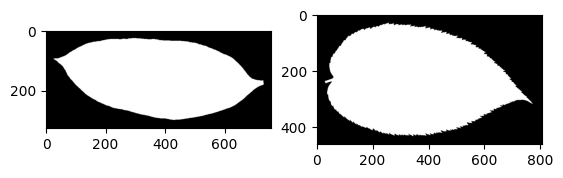

In [ ]:
# from keras.preprocessing.image import load_img
from PIL import Image
SampleCheck=ImageId_Species_test.sample()
im_check=str(SampleCheck.Id).split()[1]
name_check=str(SampleCheck.Species).split()[1]
img=load_img('/content/drive/My Drive/BW/Test/'+im_check)
plt.subplot(1,2,1)
plt.imshow(img)
for k in range(0,2971):
        i , j = tuple(ImageId_Species.iloc[k])
        if j == name_check:
            break
img_T=load_img('/content/drive/My Drive/BW/Train/'+i)
plt.subplot(1,2,2)
plt.imshow(img_T)

In [ ]:
model.save('/content/drive/My Drive/BW/leaf1.h5')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/My Drive/BW/leaf1.h5')

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/My Drive/BW/leaf1.h5')

# label_map = ['species_1', 'species_2', 'species_3', ...]

# Load the image
image_filename = '6.jpeg'
leaf_img_path = '/content/drive/My Drive/images'+'/'+image_filename
leaf_img = Image.open(leaf_img_path)
leaf_img = leaf_img.convert('L')  # Convert the image to grayscale
image = leaf_img.resize((256, 256))
input_arr = np.array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.

# Make a prediction and display the result
predictions = model.predict(input_arr)
Pre_Species = pd.DataFrame({'Id': list(predictions.reshape(99)),'LabelMap': list(label_map)})
predicted_species = str(Pre_Species[Pre_Species.Id==1.0].LabelMap).split()[1]
print('Predicted species:', predicted_species)


1/1 [==============================] - 0s 142ms/step
Predicted species: Quercus_Suber
